In [8]:
## functional layer

import numpy as np
from numba import jit
from numpy.random import default_rng as rg
rng = rg(12345)
from tqdm import tqdm
import sys
sys.path.append('../core')
%matplotlib inline

In [9]:
import torch
torch.manual_seed(0)
import torch.optim as optim

In [10]:
from FLDojo import dojo
from FS import FS
from display2 import*

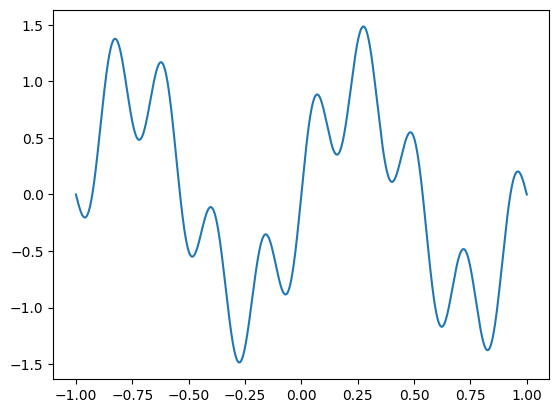

In [11]:
Xs = np.linspace(-1,1,40000)
Ys = np.sin(Xs*2*np.pi) + 0.5*np.sin(Xs*9*np.pi)
from matplotlib import pyplot as plt
plt.plot(Xs,Ys)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
p = np.random.permutation(len(Xs))
Xs = Xs[p]
Ys = Ys[p]
X = torch.from_numpy(Xs).float().unsqueeze(1).to(device)
y = torch.from_numpy(Ys).float().unsqueeze(1).to(device)
split = 0.75
train_X = X[:int(split*len(X))]
train_y = y[:int(split*len(y))]
test_X = X[int(split*len(X)):]
test_y = y[int(split*len(y)):]

In [59]:
D = dojo()
D.epochs=1000
D.max_batch_size=train_X.shape[0]
opt = lambda x: optim.Adam(x, lr=0.000001)

100%|██████████| 1000/1000 [00:13<00:00, 73.68it/s]


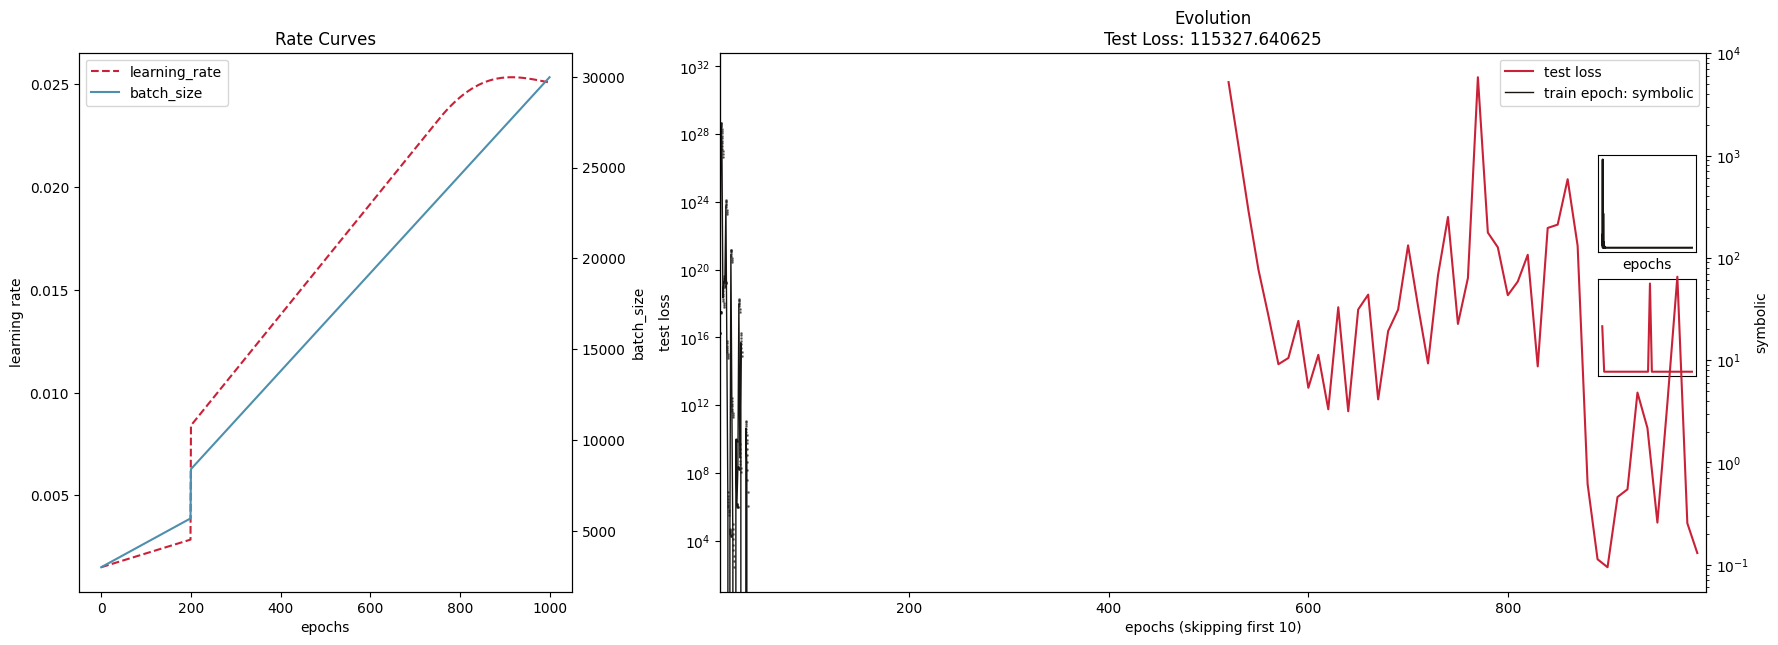

In [65]:
sizes = [1,]*3 # 2 layer network
delta = np.array([1]*len(sizes))*0.002
k = [(11/2)*np.pi]*len(sizes) # smaller k seems to help slightly, but not much.
# with torch.autograd.set_detect_anomaly(True):
net = FS(device, sizes, delta, k, opttype=opt, crit=torch.nn.SmoothL1Loss(),rl = torch.nn.LeakyReLU)
report = D.train(net, train_X, train_y, test_X, test_y, start_batch_size=train_X.shape[0]//10, repeat_epochs=1)
ecran(net, test_X, test_y, report, classification=False)

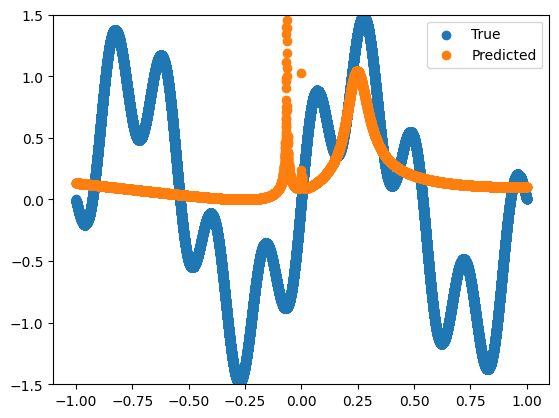

In [66]:
plt.scatter(Xs,Ys,label='True')
plt.scatter(test_X.detach().cpu().numpy(),net(test_X).detach().cpu().numpy(),label='Predicted')
plt.ylim(-1.5,1.5)
plt.legend()
plt.show()